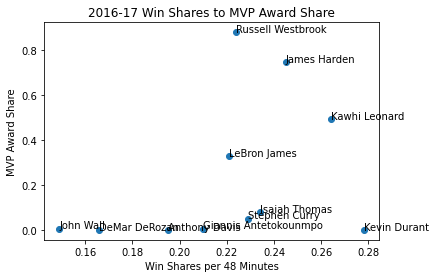

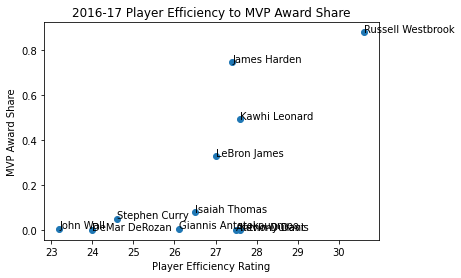

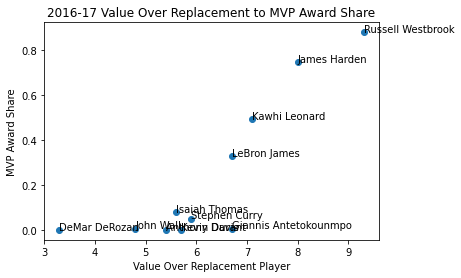

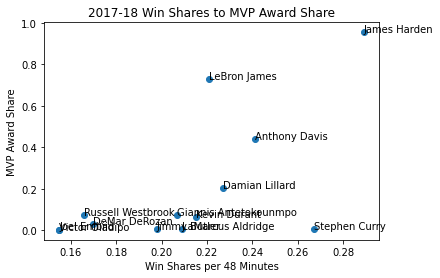

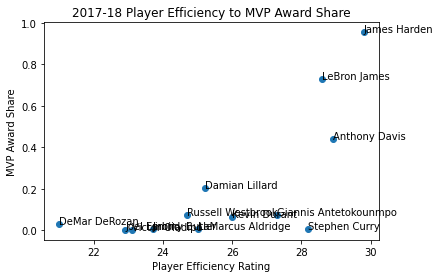

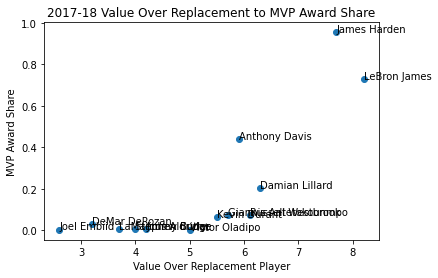

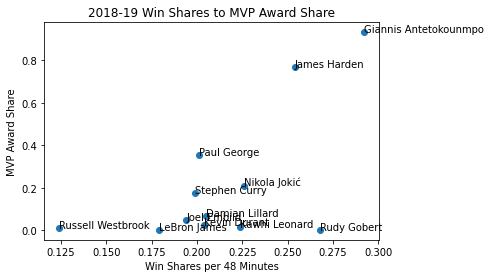

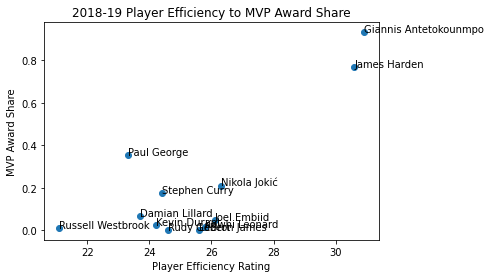

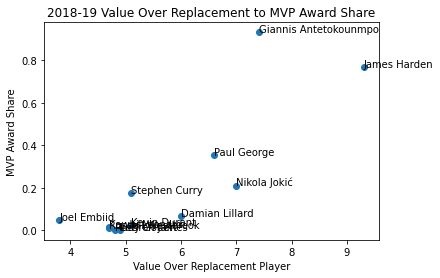

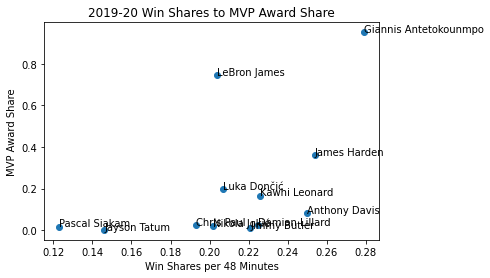

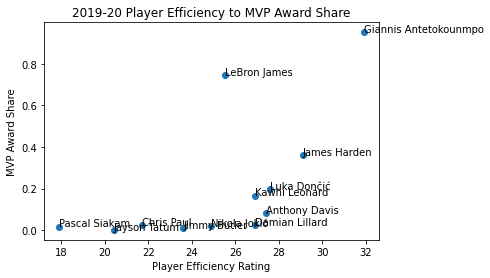

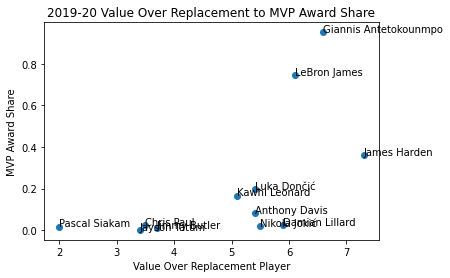

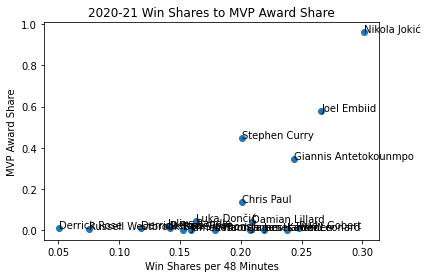

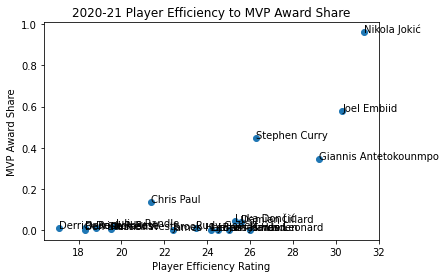

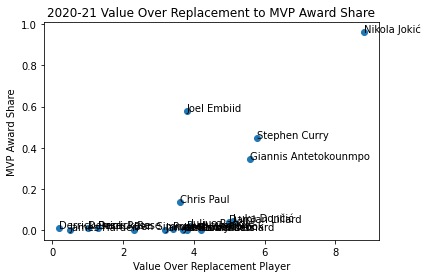

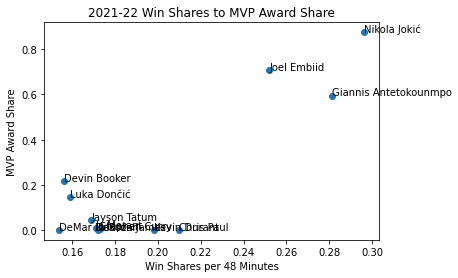

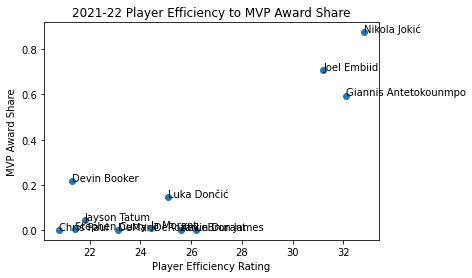

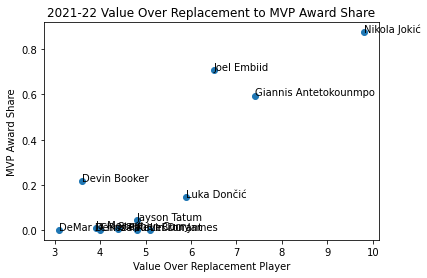

     PER  WS/48  VORP
0   26.1  0.210   6.7
1   24.6  0.229   5.9
2   27.5  0.195   5.4
3   24.0  0.166   3.3
4   27.6  0.278   5.7
..   ...    ...   ...
7   26.2  0.172   5.1
8   32.8  0.296   9.8
9   24.4  0.171   3.9
10  20.8  0.210   4.0
11  21.8  0.169   4.8

[79 rows x 3 columns]
    Share
0   0.007
1   0.051
2   0.002
3   0.001
4   0.002
..    ...
7   0.001
8   0.875
9   0.010
10  0.002
11  0.043

[79 rows x 1 columns]
     PER  WS/48  VORP
13  19.7  0.140   3.9
2   25.3  0.163   5.1
9   25.8  0.224   4.7
2   23.7  0.198   4.2
11  23.1  0.155   5.0
1   24.4  0.199   5.1
10  25.2  0.227   6.3
8   26.3  0.226   7.0
2   24.2  0.204   5.1
9   28.6  0.221   8.2
2   27.5  0.195   5.4
1   23.6  0.221   3.7
5   21.0  0.170   3.2
0   32.1  0.281   7.4
6   27.0  0.221   6.7
3   26.1  0.194   3.8
3   28.2  0.267   4.0
7   25.0  0.219   3.2
10  17.9  0.123   2.0
0   29.2  0.244   5.6
2   27.4  0.250   5.4
3   24.0  0.166   3.3
1   21.3  0.156   3.6
17  18.3  0.153   2.3
Mean Squared Error :

In [81]:
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Year values
vals = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

# X represents the three major MVP predictors (WS/48, PER, VORP); y represents the MVP award share
X = []
y = []

for val in vals:
    # File paths
    x_path = f'../data/{val}.csv'
    y_path = f'../data/{val} MVP.csv'

    # Dataframes
    df_x = pd.read_csv(x_path, usecols=["Player", "WS/48", "PER", "VORP"])
    df_y = pd.read_csv(y_path, usecols=["Player", "Share"])
    output = pd.merge(df_x, df_y, on="Player", how="inner")

    # Add new data to X and y for Multiple Linear Regression
    X.append(output.drop(columns=["Share", "Player"]))
    y.append(output.drop(columns=["Player", "WS/48", "PER", "VORP"]))

    # Win Share Plot
    fig, ax = plt.subplots()
    plt.scatter(output["WS/48"], output["Share"])
    plt.xlabel("Win Shares per 48 Minutes")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Win Shares to MVP Award Share')

    for i in range(len(output["WS/48"])):
        ax.text(output["WS/48"][i], output["Share"][i], output["Player"][i])

    plt.show()

    # Player Efficiency Rating Plot
    fig, ax = plt.subplots()
    plt.scatter(output["PER"], output["Share"])
    plt.xlabel("Player Efficiency Rating")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Player Efficiency to MVP Award Share')

    for i in range(len(output["PER"])):
        ax.text(output["PER"][i], output["Share"][i], output["Player"][i])

    plt.show()

    # Value Over Replacement Player Plot
    fig, ax = plt.subplots()
    plt.scatter(output["VORP"], output["Share"])
    plt.xlabel("Value Over Replacement Player")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Value Over Replacement to MVP Award Share')

    for i in range(len(output["VORP"])):
        ax.text(output["VORP"][i], output["Share"][i], output["Player"][i])

    plt.show()

# Dataframe concatenation for X and y variables
X = pd.concat(X)
y = pd.concat(y)
print(X)
print(y)

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_test)
model = lm.LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_test, predictions))
print('Mean Absolute Error : ', mean_absolute_error(y_test, predictions))

In [107]:
x_2023 = pd.read_csv('../data/2022-23.csv', usecols=["Player", "WS/48", "PER", "VORP", "G"])
predictions = model.predict(x_2023.drop(columns=["Player", "G"]))
res = []
for i in range(len(predictions)):
    if predictions[i] > 0 and x_2023["G"][i] > 55:
        res.append([float(predictions[i]), x_2023["Player"][i]])
res.sort(reverse=True)
for player in res:
    print(player)

[0.6825333986741997, 'Nikola Jokić']
[0.5672181053299208, 'Joel Embiid']
[0.45763495110151675, 'Luka Dončić']
[0.4126711414115023, 'Giannis Antetokounmpo']
[0.3541616565481467, 'Jimmy Butler']
[0.3334799872988732, 'Shai Gilgeous-Alexander']
[0.2830311571592805, 'Anthony Davis']
[0.2785526989007674, 'Damian Lillard']
[0.14909193304893043, 'Jayson Tatum']
[0.14860966152031851, 'Domantas Sabonis']
[0.14723372316567396, 'Stephen Curry']
[0.10818989513444222, 'Tyrese Haliburton']
[0.10759139528383987, 'Donovan Mitchell']
[0.07187763361294008, 'Ja Morant']
[0.038458060771172864, 'Kristaps Porziņģis']
[0.007607813281352627, 'Kyrie Irving']
